# Numerical experiment to understand the effect of higher level of missing data on the imputation
We will use the methods presented above the generate multivariate guassian data with different missing-data mechanism (MCAR,MAR, MNAR). We will compared in term of mean square error (MSE). Let $X$ be the complete dataset, $X^{NA}$ be the data with missing values and $X^{imp}$ be the imputed data.

$$
MSE(X^{imp}) = \frac{1}{\sum_i\sum_j 1_{X_{ij}^{NA}}=NA}\sum_i\sum_j 1_{X_{ij}^{NA}}=NA \cdot (X_{ij}^{imp}-X_{ij})^2
$$

We will also look at the $L^2$ norm of the difference of imputed mean and imputed covariance compared to the true values.

## Syntethic data
We will generate 1000 sample of 5-variate Gaussian random variable:

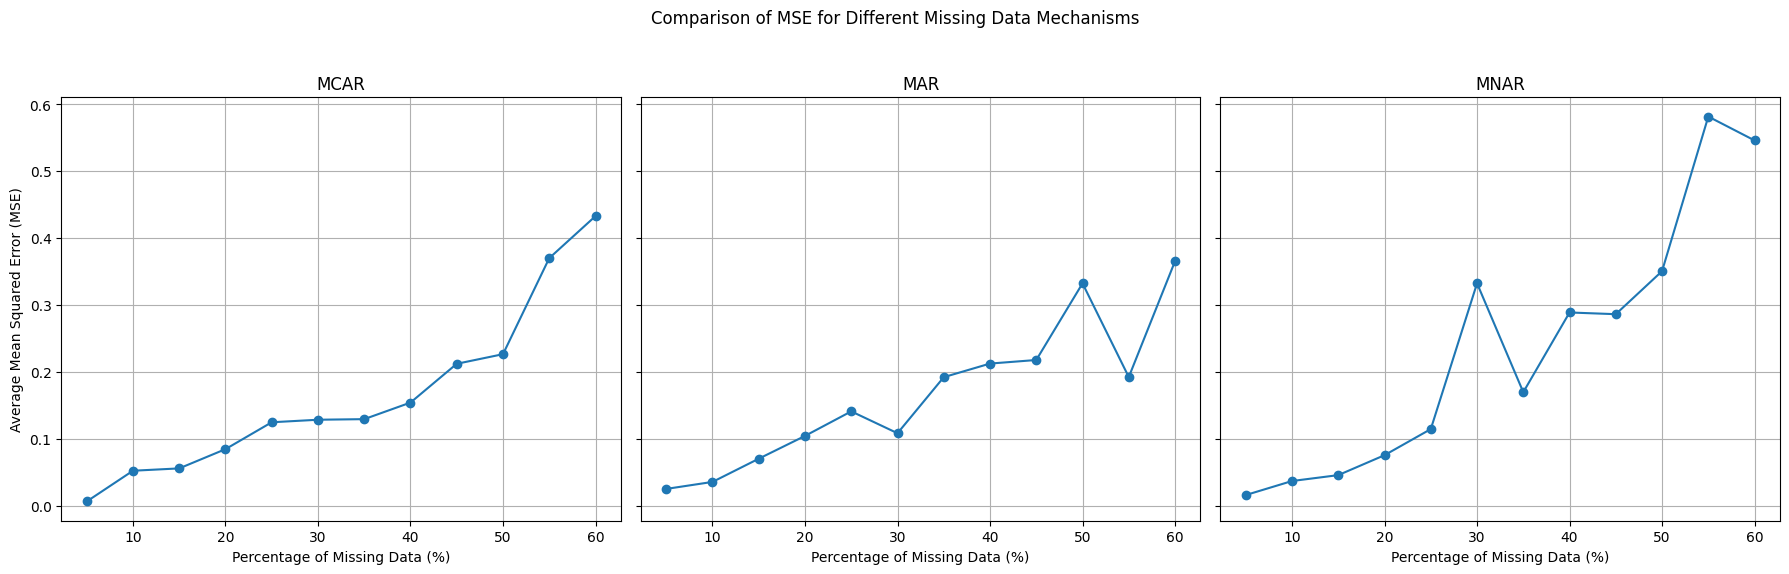

In [1]:
from library import *

# Generate synthetic data
np.random.seed(542526)
data, true_mean, true_cov = generate_synthetic_data(n_samples=100, n_features=5)

# Call the function with your data
plot_combined(data, opt="logistic")

We can see that our EM algorithm imputes MCAR missing dataset the best, followed by MAR and MNAR. We also observe an increase in the mean squared error as the percentage of missing data increases.

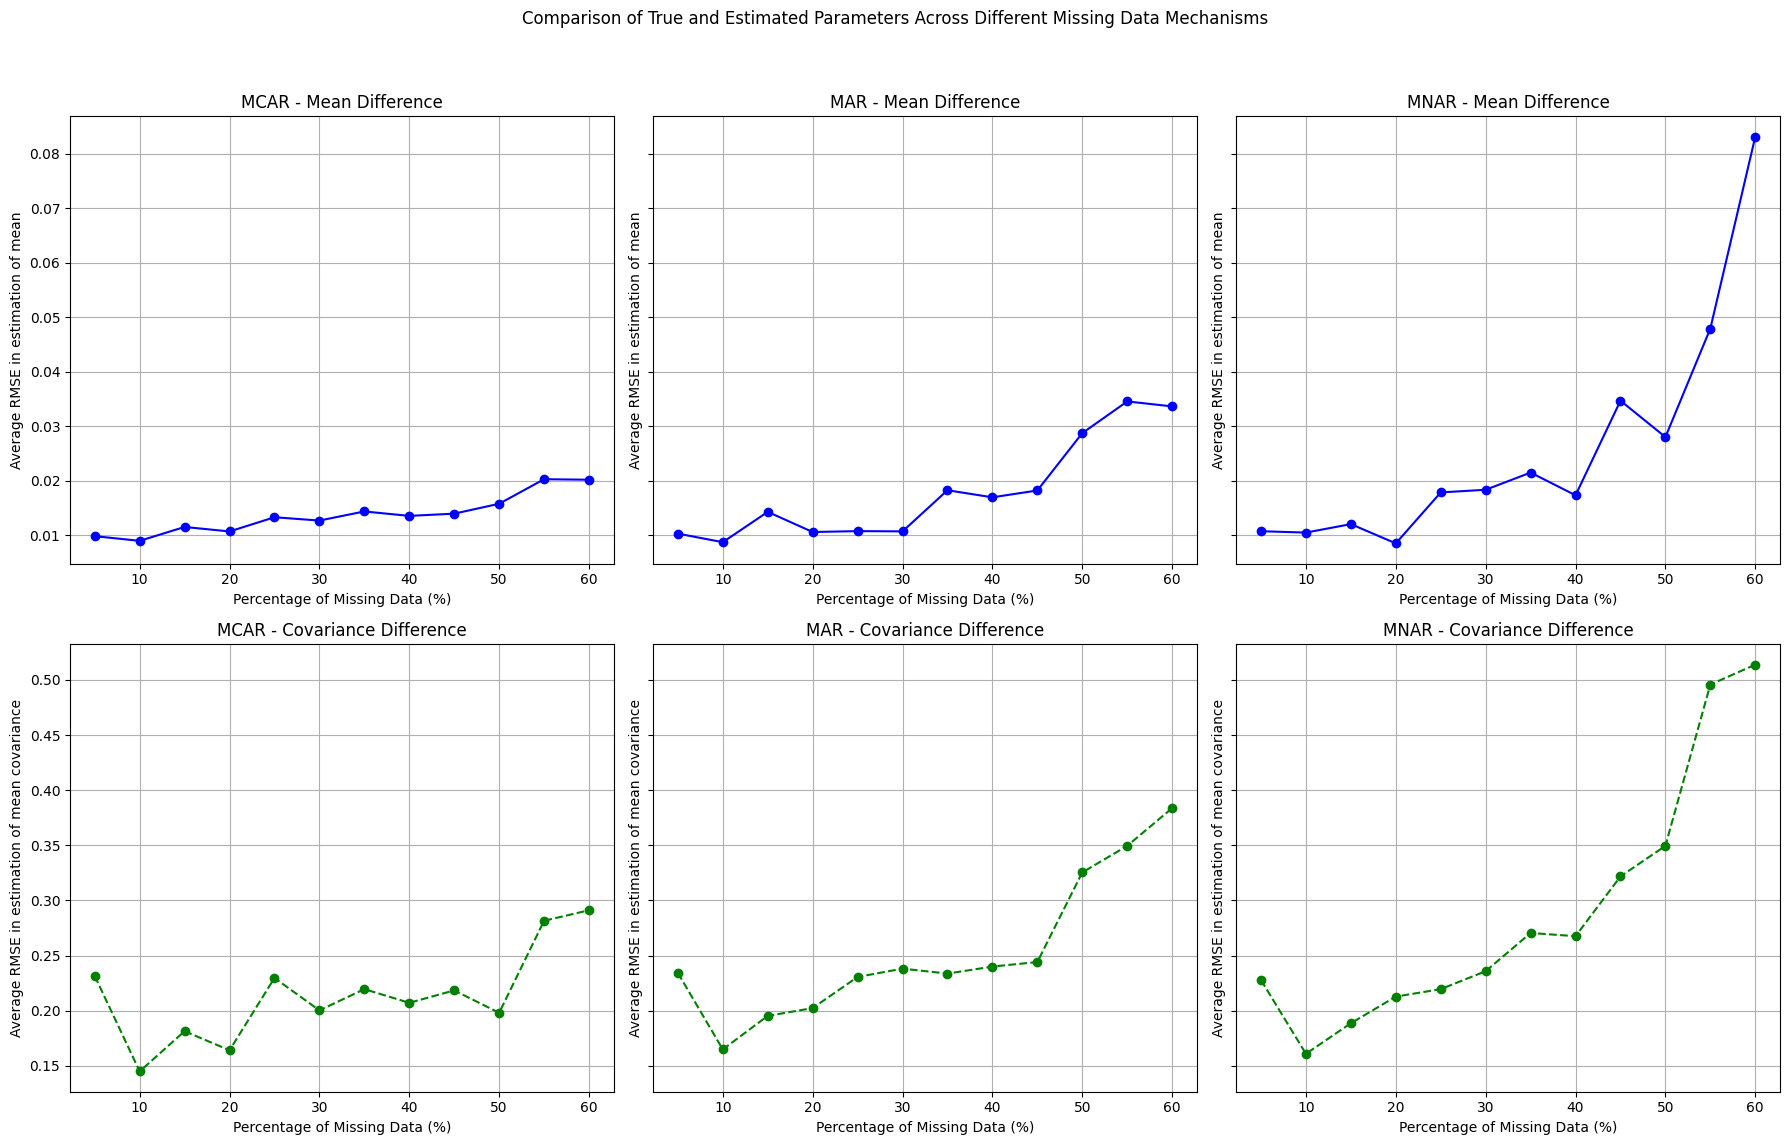

In [2]:
from library import *

# Call the plotting function
plot_all_differences_combined(data, true_mean, true_cov, opt="logistic")

# Numerical comparison of the accuracy of EM algorithm imputation versus other imputation methods
We will compare the performance of our EM algorithm versus three other well known imputation methods.

## Median Imputation

### Introduction

Median imputation is a straightforward method for handling missing data in statistical analysis and machine learning. This method is favored for its simplicity.
### Mathematical Concept

The principle behind median imputation is to replace missing values in a dataset with the median of the observed (non-missing) values in the same feature. This method is particularly effective when the data distribution is skewed, as the median is less sensitive to outliers than the mean.

#### Process:

Given a dataset with features $X = \{x_1, x_2, ..., x_n\}$ and a feature $X_j$ with missing values, the median imputation process can be described as follows:

1. **Calculate the Median**: For feature $ X_j $, calculate the median of the non-missing values.
   $$ \text{Median}(X_j) = \text{median}(\{x_{1j}, x_{2j}, ..., x_{nj}\}) $$

2. **Impute Missing Values**: Replace each missing value in $ X_j$ with the calculated median.
   $$ x_{ij} = \text{Median}(X_j) \quad \text{for all missing } x_{ij} \text{ in } X_j $$

### Algorithmic Complexity

The computational complexity of median imputation is relatively low. It primarily involves sorting the observed values to find the median, which is computationally efficient.

### Advantages and Limitations

- **Simplicity**: It is straightforward to implement and understand.
- **Limitation**: Median imputation does not consider relationships between features. It treats each feature independently, which might not be ideal for datasets where variables are correlated.
- **Data Distortion**: Overuse of median imputation, especially with a significant amount of missing data, can lead to biased estimates and underestimation of the variability in the data.

### Applications

Median imputation is widely used in scenarios where the data is not normally distributed, or the presence of outliers might skew the mean. It is a common choice in exploratory data analysis and preliminary data cleaning steps.

# K-Nearest Neighbors (KNN) Imputation

## Introduction

K-Nearest Neighbors (KNN) imputation is a non-parametric technique utilized in data science and statistics for imputing missing data. It operates on the principle that similar data points (neighbors) can be found within a dataset, and missing values can be estimated based on these neighbors. The method is particularly effective when the data has a structure where proximity in feature space correlates with similarity in values [@10.1093/bioinformatics/17.6.520].

## Mathematical Concept

### The Principle of KNN Imputation

The core idea behind KNN imputation is that the missing values of a data point can be imputed by looking at the 'k' closest points in the feature space and aggregating their values to estimate the missing ones.

### Distance Metrics

The KNN algorithm uses distance metrics to determine the closeness of data points. Common distance metrics include:

1. **Euclidean Distance**: 
   $$ d(x_i, x_j) = \sqrt{\sum_{k=1}^{m}(x_{ik} - x_{jk})^2} $$
2. **Manhattan Distance**: 
   $$ d(x_i, x_j) = \sum_{k=1}^{m}|x_{ik} - x_{jk}| $$
3. **Minkowski Distance**: 
   $$ d(x_i, x_j) = \left( \sum_{k=1}^{m}|x_{ik} - x_{jk}|^p \right)^{\frac{1}{p}} $$

### Imputation Procedure

1. **Normalize the Data**: Normalization ensures that each feature contributes equally to the distance calculations.
2. **Compute Distances**: For a data point with missing values, compute the distance to other points in the dataset.
3. **Identify 'k' Nearest Neighbors**: Select the 'k' points that are closest to the point with missing data.
4. **Aggregate Neighbor Values**: Impute the missing values using the mean, median, or mode of the neighbors' values.

## Computational Complexity

The KNN algorithm can be computationally expensive, especially for large datasets, as it involves calculating distances between multiple data points. This complexity can be mitigated by using efficient data structures like kd-trees or ball trees.

## Limitations

- **Curse of Dimensionality**: In high-dimensional spaces, the concept of proximity may become less meaningful.
- **Outliers**: KNN is sensitive to outliers, as they can significantly skew the distance calculations.
- **Choice of 'k'**: The selection of 'k' is crucial and can greatly affect the imputation's accuracy.

## Applications

KNN imputation is widely used in various fields, including bioinformatics, finance, and social sciences, particularly in scenarios where linear assumptions are not suitable.


# reference
@article{10.1093/bioinformatics/17.6.520,
    author = {Troyanskaya, Olga and Cantor, Michael and Sherlock, Gavin and Brown, Pat and Hastie, Trevor and Tibshirani, Robert and Botstein, David and Altman, Russ B.},
    title = "{Missing value estimation methods for DNA microarrays }",
    journal = {Bioinformatics},
    volume = {17},
    number = {6},
    pages = {520-525},
    year = {2001},
    month = {06},
    abstract = "{Motivation: Gene expression microarray experiments can generate
  data sets with multiple missing expression values. Unfortunately,
  many algorithms for gene expression analysis require a complete
  matrix of gene array values as input. For example, methods such as
  hierarchical clustering and K-means clustering are not robust to
  missing data, and may lose effectiveness even with a few missing
  values. Methods for imputing missing data are needed, therefore, to
  minimize the effect of incomplete data sets on analyses, and to
  increase the range of data sets to which these algorithms can be
  applied. In this report, we investigate automated methods for
  estimating missing data.Results: We present a comparative study of several methods for
  the estimation of missing values in gene microarray data. We
  implemented and evaluated three methods: a Singular Value
  Decomposition (SVD) based method (SVDimpute), weighted K-nearest
  neighbors (KNNimpute), and row average. We evaluated the methods
  using a variety of parameter settings and over different real data
  sets, and assessed the robustness of the imputation methods to the
  amount of missing data over the range of 1–20\\% missing values.
  We show that KNNimpute appears to provide a more robust and
  sensitive method for missing value estimation than SVDimpute, and
  both SVDimpute and KNNimpute surpass the commonly used row average
  method (as well as filling missing values with zeros). We report
  results of the comparative experiments and provide recommendations
  and tools for accurate estimation of missing microarray data under a
  variety of conditions.Availability: The software is available at http://smi-web.stanford.edu/projects/helix/pubs/impute/Contact: russ.altman@stanford.edu*To whom correspondence should be
  addressed.}",
    issn = {1367-4803},
    doi = {10.1093/bioinformatics/17.6.520},
    url = {https://doi.org/10.1093/bioinformatics/17.6.520},
    eprint = {https://academic.oup.com/bioinformatics/article-pdf/17/6/520/48837104/bioinformatics\_17\_6\_520.pdf},
}

# Iterative Imputer in Scikit-learn (sklearn)

## Introduction

The Iterative Imputer in Scikit-learn is an implementation of the Multiple Imputation by Chained Equations (MICE) algorithm, a sophisticated approach to handling missing data in datasets. It's especially useful when the missing data are not Missing Completely At Random (MCAR) but rather Missing At Random (MAR) or Missing Not At Random (MNAR) [[Van Buuren & Groothuis-Oudshoorn, 2011]](#references).

## Algorithmic Overview

### Concept

Iterative Imputer works by modeling each feature with missing data as a function of other features in a round-robin or chained equation fashion. It iteratively updates the imputations for each feature by modeling them as the outcome of a regression, using the other features as predictors.

### Mathematical Formulation

Given a dataset with features $ X = \{x_1, x_2, ..., x_n\} $, the algorithm treats each feature with missing values as a dependent variable in a regression model, with the remaining features acting as independent variables.

#### Iterative Process:

1. **Initial Imputation**: Start by imputing missing values using mean, median, or mode imputation.
2. **Chained Equations**: Sequentially model each feature $ X_j $ with missing data:
   - Use other features $X_{-j}$ as predictors in a regression model to predict $ X_j $.
   - Update the imputed values of $ X_j $ based on the model's predictions.
3. **Cycle Through Features**: Repeat this process, cycling through all features multiple times.

### Regression Models

The choice of regression model is flexible:
- For continuous data, models like linear regression are commonly used.
- For categorical data, logistic regression or other classification models can be utilized.

### Convergence and Stopping Criteria

The algorithm iterates until convergence, typically assessed by the change in imputed values across iterations or a maximum number of iterations.

## Practical Implementation in sklearn

Sklearn's Iterative Imputer allows for various options and customizations:
- **Estimator**: Choice of the regression estimator (e.g., `BayesianRidge`, `DecisionTreeRegressor`).
- **Max Iter**: Maximum number of imputation rounds.
- **Tolerance**: Convergence criterion to stop imputations.

## Advantages and Challenges

- **Flexibility**: Capable of handling different types of data and relationships.
- **Model Dependency**: The quality of imputations relies heavily on the chosen regression models.
- **Computational Intensity**: Can be computationally demanding for large datasets with many features.

## Applications

Iterative Imputer is utilized in scenarios where the dataset contains complex relationships among variables, such as in biomedical data, social sciences, and financial data analysis.

## References

- Van Buuren, S., & Groothuis-Oudshoorn, K. (2011). "MICE: Multivariate Imputation by Chained Equations in R". Journal of Statistical Software.

---

## Conclusion

The Iterative Imputer in sklearn is a powerful tool for imputing missing data, particularly in complex datasets where simple imputation methods might fall short. Its effectiveness depends on the appropriate selection of regression models and the careful handling of convergence criteria [[Van Buuren & Groothuis-Oudshoorn, 2011]](#references).

In [3]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def plot_combined(data, missing_data_percentages=np.arange(5, 65, 5), em_iterations=5, opt="logistic"):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # Function to compute average MSE over multiple imputation method iterations
    def compute_average_mse_imputation_method(impute_method, X_incomp):
        mse_agg = []
        for _ in range(em_iterations):
            imputed_data = impute_method.fit_transform(X_incomp)
            mse = mean_squared_error(data, imputed_data)
            mse_agg.append(mse)
        return np.mean(mse_agg)

    methods = ['EM', 'Median', 'KNN', 'Iterative']
    p_obs = 0.2
    for i, mechanism in enumerate(['MCAR', 'MAR', 'MNAR']):
        mse_values = {method: [] for method in methods}
        
        for p_miss in missing_data_percentages:
            if mechanism == 'MCAR':
                missing_data_info = produce_NA(data, p_miss / 100.0, mecha=mechanism)
            elif mechanism == 'MAR':
                missing_data_info = produce_NA(data, (p_miss / 100.0)/(1-p_obs), mecha=mechanism, p_obs=p_obs)
            else:  # MNAR
                missing_data_info = produce_NA(data, (p_miss / 100.0)/(1-p_obs), mecha=mechanism, p_obs=p_obs, q=0.7, opt=opt)

            X_incomp = missing_data_info['X_incomp'].numpy()

            # EM Algorithm
            imputed_data_em, _, _ = em_algorithm(X_incomp)
            mse_values['EM'].append(mean_squared_error(data, imputed_data_em))

            # Median Imputation
            imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
            mse_values['Median'].append(compute_average_mse_imputation_method(imp_median, X_incomp))

            # KNN Imputation
            imp_knn = KNNImputer(n_neighbors=5)
            mse_values['KNN'].append(compute_average_mse_imputation_method(imp_knn, X_incomp))

            # Iterative Imputer
            imp_iterative = IterativeImputer(max_iter=100)
            mse_values['Iterative'].append(compute_average_mse_imputation_method(imp_iterative, X_incomp))

        for method in methods:
            axs[i].plot(missing_data_percentages, mse_values[method], marker='o', label=method)
        axs[i].set_title(mechanism)
        axs[i].set_xlabel('Percentage of Missing Data (%)')
        axs[i].grid(True)

    axs[0].set_ylabel('Average Mean Squared Error (MSE)')
    axs[0].legend()
    fig.suptitle('Comparison of MSE for Different Missing Data Mechanisms')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [4]:
def plot_all_differences_combined(data, true_mean, true_cov, missing_data_percentages=np.arange(5, 65, 5), em_iterations=5, opt="logistic"):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharey='row')
    
    methods = ['EM', 'Median', 'KNN', 'Iterative']  # Define methods list
    p_obs = 0.2
    for i, mechanism in enumerate(['MCAR', 'MAR', 'MNAR']):
        mean_diffs = {method: [] for method in methods}
        cov_diffs = {method: [] for method in methods}

        for p_miss in missing_data_percentages:
            for method in methods:
                mean_diff_agg = []
                cov_diff_agg = []

                for _ in range(em_iterations):
                    if mechanism == 'MCAR':
                        missing_data_info = produce_NA(data, p_miss / 100.0, mecha=mechanism)
                    elif mechanism == 'MAR':
                        missing_data_info = produce_NA(data, (p_miss / 100.0)/(1-p_obs), mecha=mechanism, p_obs=p_obs)
                    elif mechanism == 'MNAR':
                        missing_data_info = produce_NA(data, (p_miss / 100.0)/(1-p_obs), mecha=mechanism, p_obs=p_obs, opt = opt)

                    X_incomp = missing_data_info['X_incomp'].numpy()

                    # Choose imputation method
                    if method == 'EM':
                        imputed_data, estimated_mean, estimated_cov = em_algorithm(X_incomp)
                    else:
                        if method == 'Median':
                            imputer = SimpleImputer(missing_values=np.nan, strategy='median')
                        elif method == 'KNN':
                            imputer = KNNImputer(n_neighbors=5)
                        elif method == 'Iterative':
                            imputer = IterativeImputer(max_iter=100)
                        
                        imputed_data = imputer.fit_transform(X_incomp)
                        estimated_mean, estimated_cov = gaussian_MLE(imputed_data)

                    # Calculate differences
                    mean_diff = np.linalg.norm(true_mean - estimated_mean) / (np.linalg.norm(true_mean))
                    cov_diff = np.linalg.norm(true_cov - estimated_cov, ord='fro') / (np.linalg.norm(true_cov, ord='fro'))
                    mean_diff_agg.append(mean_diff)
                    cov_diff_agg.append(cov_diff)

                # Averaging over iterations
                mean_diffs[method].append(np.mean(mean_diff_agg))
                cov_diffs[method].append(np.mean(cov_diff_agg))

        # Plot mean differences
        for method in methods:
            axs[0, i].plot(missing_data_percentages, mean_diffs[method], marker='o', label=method)
            axs[0, i].set_title(f'{mechanism} - Mean Difference')
            axs[0, i].set_xlabel('Percentage of Missing Data (%)')
            axs[0, i].set_ylabel('Average RMSE in estimation of mean')
            axs[0, i].grid(True)
            axs[0, i].legend()

        # Plot covariance differences
        for method in methods:
            axs[1, i].plot(missing_data_percentages, cov_diffs[method], marker='o', label=method, linestyle='--')
            axs[1, i].set_title(f'{mechanism} - Covariance Difference')
            axs[1, i].set_xlabel('Percentage of Missing Data (%)')
            axs[1, i].set_ylabel('Average Frobenius Norm of Covariance Difference')
            axs[1, i].grid(True)
            axs[1, i].legend()

    plt.suptitle('Comparison of True and Estimated Parameters Across Different Missing Data Mechanisms')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/li

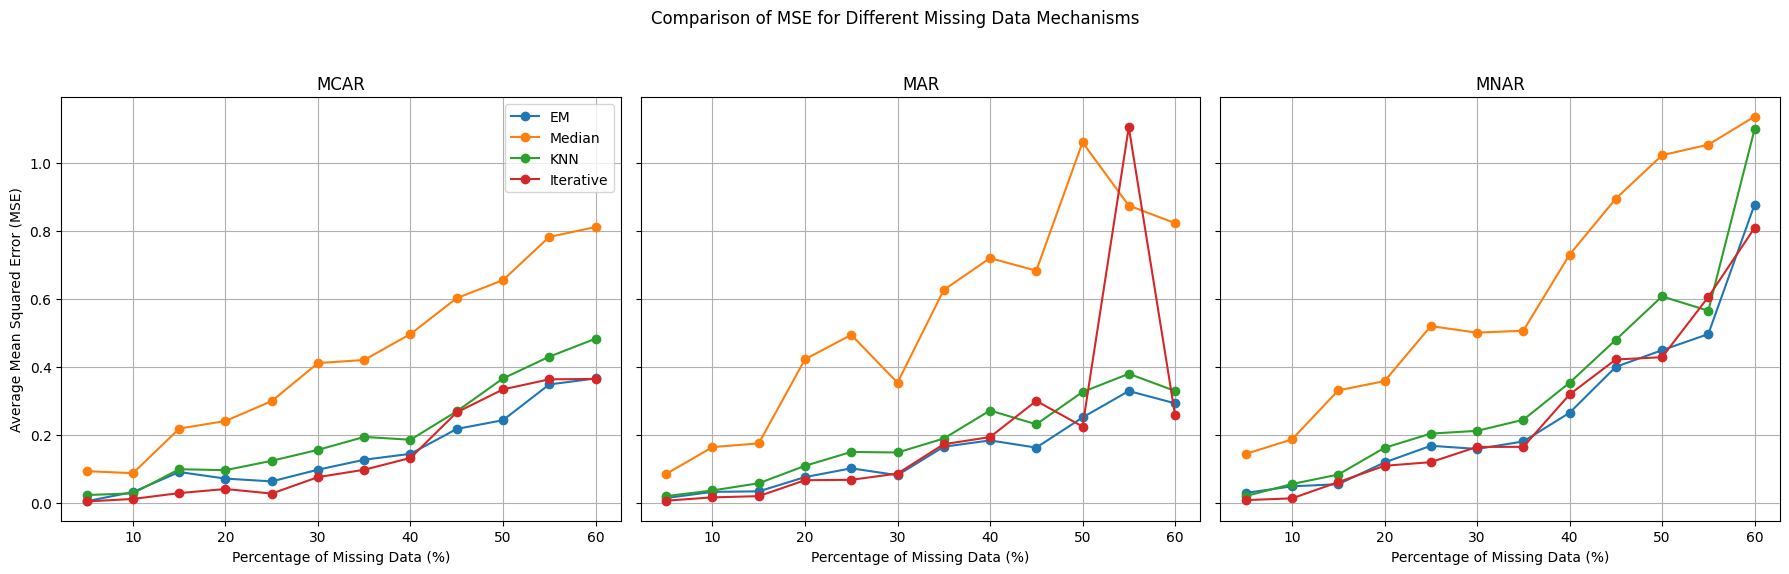

/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lee_george/Code project/Statistical_computation_visualisation/.venv/li

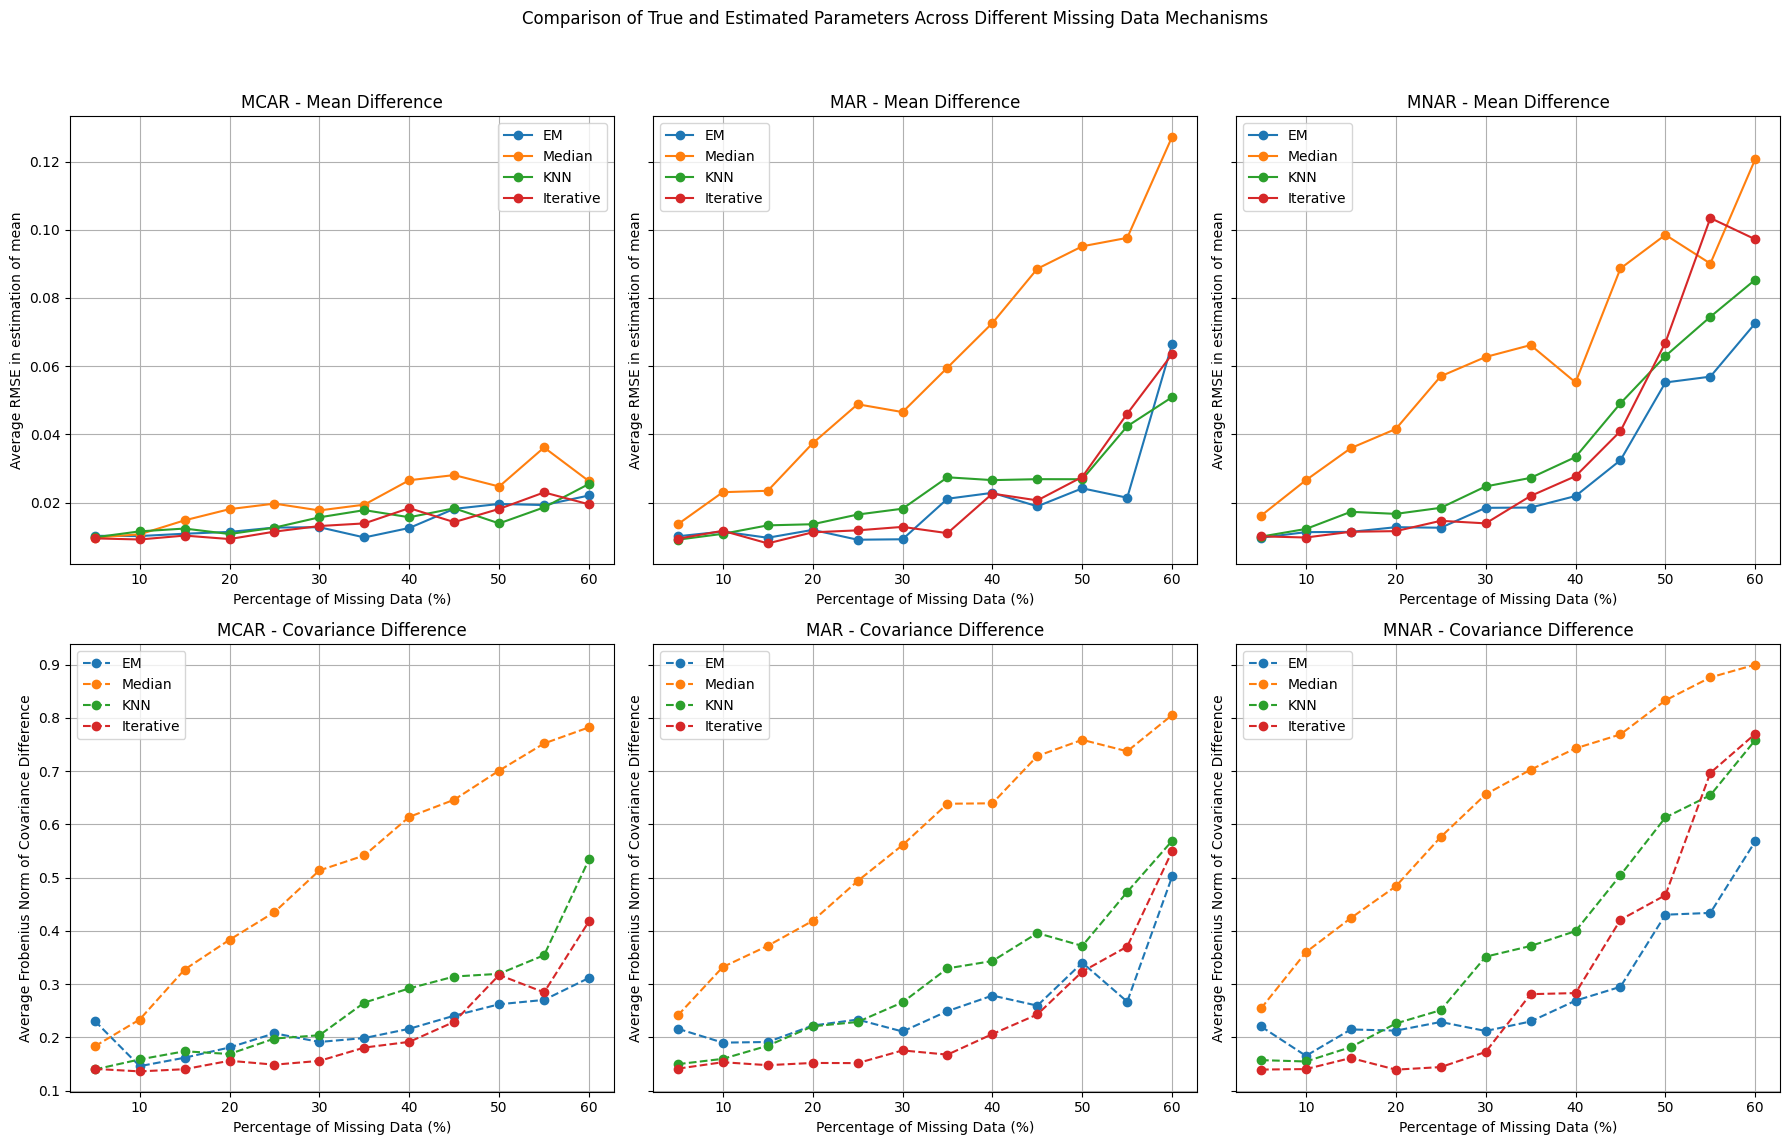

In [5]:
# Generate synthetic data
np.random.seed(542526)
data, true_mean, true_cov = generate_synthetic_data(n_samples=100, n_features=5)

# Call the function with your data
plot_combined(data, opt="logistic")

# Call the plotting function
plot_all_differences_combined(data, true_mean, true_cov, opt="logistic")